<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Functions" data-toc-modified-id="Functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Functions</a></span><ul class="toc-item"><li><span><a href="#Generating-K-space-for-FLASH-Sequence" data-toc-modified-id="Generating-K-space-for-FLASH-Sequence-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Generating K-space for FLASH Sequence</a></span><ul class="toc-item"><li><span><a href="#Opens-Raw-Data-from-.fid-file" data-toc-modified-id="Opens-Raw-Data-from-.fid-file-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Opens Raw Data from .fid file</a></span></li><li><span><a href="#Converts-Raw-Data-into-Raw-Complex-FID" data-toc-modified-id="Converts-Raw-Data-into-Raw-Complex-FID-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Converts Raw Data into Raw Complex FID</a></span></li></ul></li></ul></li><li><span><a href="#Plot-Functions" data-toc-modified-id="Plot-Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plot Functions</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Plotting-DICOM-Data" data-toc-modified-id="Plotting-DICOM-Data-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Plotting DICOM Data</a></span></li><li><span><a href="#K-Space-Plot-Function" data-toc-modified-id="K-Space-Plot-Function-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>K-Space Plot Function</a></span></li><li><span><a href="#Plot-Image-Space" data-toc-modified-id="Plot-Image-Space-2.0.3"><span class="toc-item-num">2.0.3&nbsp;&nbsp;</span>Plot Image Space</a></span></li><li><span><a href="#Function-to-load-all-DICOM-files-within-a-folder-location" data-toc-modified-id="Function-to-load-all-DICOM-files-within-a-folder-location-2.0.4"><span class="toc-item-num">2.0.4&nbsp;&nbsp;</span>Function to load all DICOM files within a folder location</a></span></li></ul></li></ul></li><li><span><a href="#Read-Experiment-Files" data-toc-modified-id="Read-Experiment-Files-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read Experiment Files</a></span></li><li><span><a href="#Raw-Data" data-toc-modified-id="Raw-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Raw Data</a></span></li><li><span><a href="#Generates-Complex-FID" data-toc-modified-id="Generates-Complex-FID-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Generates Complex FID</a></span></li><li><span><a href="#K-Space-and-Image-Plots" data-toc-modified-id="K-Space-and-Image-Plots-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>K-Space and Image Plots</a></span><ul class="toc-item"><li><span><a href="#K-Space" data-toc-modified-id="K-Space-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>K-Space</a></span></li><li><span><a href="#Image-from-Reconstructed-Raw-Data" data-toc-modified-id="Image-from-Reconstructed-Raw-Data-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Image from Reconstructed Raw Data</a></span></li><li><span><a href="#Image-from-DICOM-Data" data-toc-modified-id="Image-from-DICOM-Data-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Image from DICOM Data</a></span></li></ul></li></ul></div>

# Phantom Scan

To understand further how k-space is formed from raw data the function used within the BrukerMRI package is used as an example. Using a FLASH sequence, the image of kiwi is obtained from the raw data.

In [1]:
import BrukerMRI as bruker
import pylab as pl

# Python Module for Opening DICOM files
import pydicom as dcm

import pandas as pd

import math
import numpy as np
import matplotlib.pyplot as plt
import glob
from os.path import expanduser
import os
from matplotlib import cm
import cmath

## Functions

### Generating K-space for FLASH Sequence

<p> Fast low angle shot magnetic resonance imaging (FLASH MRI).
<p> It is a gradient echo sequence which combines a 
<p> 1) Low-flip angle radio-frequency excitation 
<p> 2) Short repetition time.

In [2]:
  def GenKspace_FLASH(raw,acqp,method):

        complexValues = raw
  
        NScans = (acqp["NI"]    # no. of images
                  * acqp["NAE"] # no. of experiments
                  * acqp["NA"]  # no. of averages
                  * acqp["NR"])  # no. of repetitions
    
        Matrix = method["PVM_Matrix"]

        kSpace = np.reshape(complexValues, (-1,Matrix[0]),
                          order="F")
        kSpace = np.reshape(kSpace, (-1, Matrix[0], Matrix[1]))
        kSpace = np.transpose(kSpace, (1,2,0))
        return kSpace

#### Opens Raw Data from .fid file

In [3]:
def ReadRawData(filepath):
   with open(filepath, "r") as f:
        return np.fromfile(f, dtype=np.int32)

#### Converts Raw Data into Raw Complex FID

In [4]:
# generate complex FID from Raw Data
def raw_fid(raw_data):
    raw_fid = np.zeros(raw_data.shape, dtype ='complex')
    raw_fid = raw_data[0::2] + 1j * raw_data[1::2]
    return raw_fid

def fft_image(Kspace):
    
    return (np.fft.fft2(Kspace))

In [5]:
def fft_image(Kspace):
    
    return (np.fft.fftshift(np.fft.fft2(Kspace)))

In [6]:
def Reco_FLASH(k_data):
        
        k_data = k_data.copy()
        reco_data = np.zeros(k_data.shape)

        for i in range(0,k_data.shape[2]):
            reco_data[:,:,i] = abs(fft_image(k_data[:,:,i]))
 
        return reco_data

## Plot Functions

#### Plotting DICOM Data

In [7]:
def plotDcm(plots):

    for i in range(len(plots)):
        plt.figure(figsize=(10, 10))
        plt.imshow(plots[i], cmap=plt.cm.gray)
    return plt.show()

#### K-Space Plot Function

In [8]:
def plot_k_space(plots):
    
    SMALL_SIZE = 16
    MEDIUM_SIZE = 18
    BIGGER_SIZE = 20
    COLOR = 'black'
    
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    plt.rcParams['text.color'] = COLOR
    plt.rcParams['axes.labelcolor'] = COLOR
    plt.rcParams['xtick.color'] = COLOR
    plt.rcParams['ytick.color'] = COLOR

    plt.figure(figsize=(10,10))
    plt.imshow(np.log(1+np.abs(plots[:,:])),cmap=plt.cm.gray)
    plt.xlabel("kx")
    plt.ylabel("ky")
    plt.title('k-space')
    plt.colorbar()
    return 

#### Plot Image Space

In [9]:
def plot_i_space(plots):
    
    SMALL_SIZE = 16
    MEDIUM_SIZE = 18
    BIGGER_SIZE = 20
    COLOR = 'black'
    
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    
    plt.figure(figsize=(10,10))
    plt.rcParams['text.color'] = COLOR
    plt.rcParams['axes.labelcolor'] = COLOR
    plt.rcParams['xtick.color'] = COLOR
    plt.rcParams['ytick.color'] = COLOR

    plt.imshow(abs(plots[:,:]),cmap=plt.cm.gray)
    plt.title('Image from Constructed k-space')
    plt.colorbar()
    return


#### Function to load all DICOM files within a folder location

In [10]:
def readFolderDcm(foldername):
    # input arguments:
    #  - foldername : folder with all DICOM files for one image series 
    # output:
    # - pixeldata  : list of rescaled pixel dicom data values 
    # - sl : list of SLiceLocation dicom tags (string)
    # - dataset : complete list of dicom tags
    
    # list of all *.dcm files in data folder
    dcmfiles = glob.glob(os.path.join(foldername, "*.dcm"));

    dataset = []; # complete dicom data (tags + pixel data)
    pixeldata = [];  # rescaled pixel data
    sl = []; # 2D slice locations
    
    for i in range(len(dcmfiles)):
        y = dcm.dcmread(dcmfiles[i])
        # rescale dicom data (uint16) to real (float) valued intensities
        ys = y.pixel_array * y.RescaleSlope + y.RescaleIntercept
        
        pixeldata.append(ys)
        dataset.append(y)
        
        # slice location
        sl.append(y.SliceLocation)

    # convert to a numpy array and rearrange dimensions from [Nimages Ny Nx] -> [Ny Nx Nimages] 
    pixeldata = np.asarray(pixeldata, dtype = np.float)
    pixeldata = np.transpose( pixeldata,(1,2,0))

    sl = np.round(np.asarray(sl,  dtype = np.float), 3)  # convert to float and round to 3rd decimal place
    
    return pixeldata

## Read Experiment Files
<p> 1) Read in a Bruker MRI Experiment. 
<p> 2) Returns raw data, processed data, and method and acqp parameters in a dictionary.
<p> Since BrukerMRI package has conveniently structured the Method and Acquisition files into dictionaries of classes, they will be used
<p> Only the extraction of raw data, k-space generation and image space generation will be done manually.

In [11]:
# copy and paste entire directory but replace "\" with "/"
# Place a "/" at the end of the line
MainDir = "C:/Users/daniala/Desktop/mri/20191210_104049_MRMD_phantom_practice_1_3/"
ExpNum = 8
Experiment = bruker.ReadExperiment(MainDir, ExpNum)

In [12]:
acqp = Experiment.acqp

In [13]:
method = Experiment.method

## Raw Data

Raw data is read from the fid file that comes in scan files

In [14]:
raw_data = ReadRawData(MainDir + str(ExpNum) + "/fid")
raw_data = np.array(raw_data)
raw_data

array([ 15,  43, 145, ..., -87,   6, 140])

Notice that the raw data is initially in an array of real numbers which are in fact in real and imaginary pairs.

## Generates Complex FID

In [15]:
raw_fid = raw_fid(raw_data)
raw_fid

array([  15. +43.j,  145.+330.j,  171.+380.j, ..., -174.-212.j,
        -29. -87.j,    6.+140.j])

In [16]:
k_space = GenKspace_FLASH(raw_fid,acqp,method)

## K-Space and Image Plots

### K-Space

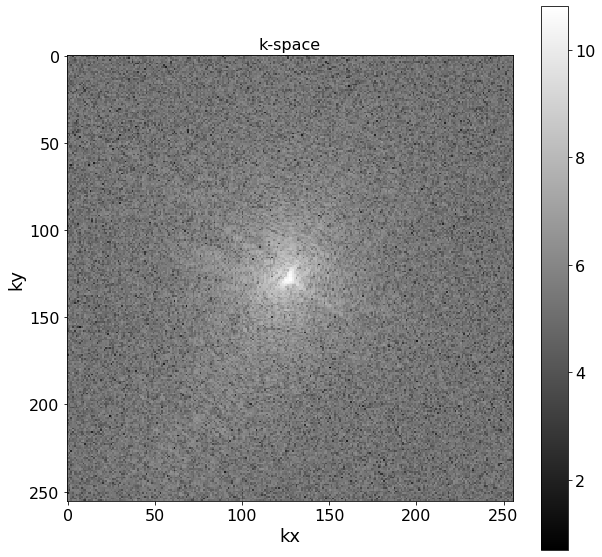

In [17]:
plot_k_space(k_space[:,:,0])

### Image from Reconstructed Raw Data

In [18]:
reco_array = Reco_FLASH(k_space)

In [19]:
reco_array.shape

(256, 256, 1)

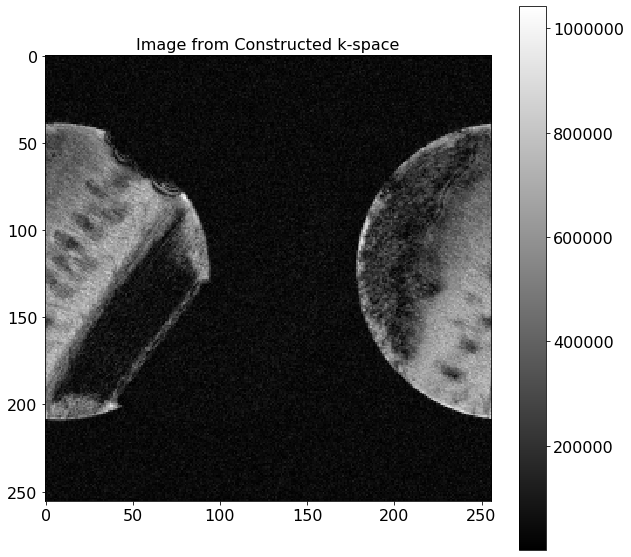

In [20]:
plot_i_space(reco_array[:,:,0])

### Image from DICOM Data

In [21]:
dicomdir = "C:/Users/daniala/Desktop/MRI/20191210_104049_MRMD_phantom_practice_1_3/8/pdata/1/dicom/"
dcm = readFolderDcm(dicomdir)

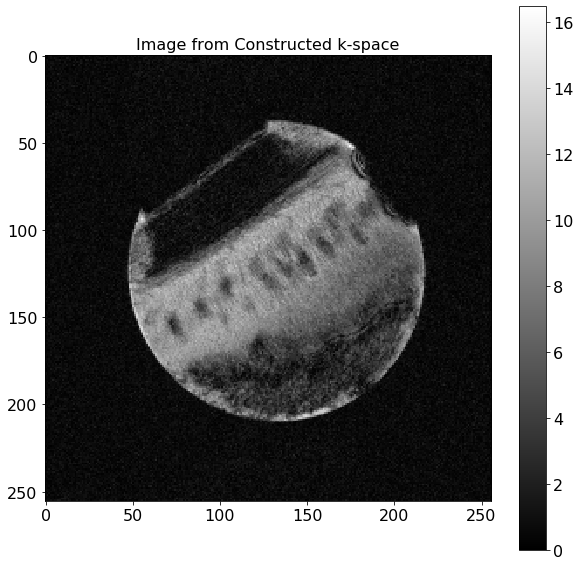

In [22]:
plot_i_space(dcm[:,:,0])

# Conclusions

Using raw data from MRI scnas, the data can be used to reconstruct k-space and the image. In this example a single coil and slice FLASH image was used.
<p> The generated image from raw data does differ from the DICOM data as such further sections will include ways to correct the images.